In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from google.colab import files

# Load the dataset
# Replace 'breast_cancer_data.csv' with your actual file name
data = pd.read_csv('breast_cancer_data.csv')

# Preprocess the data
# Convert 'diagnosis' column to binary (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Define features and target
X = data.drop(columns=['id', 'diagnosis'])  # Drop ID and target column
y = data['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees by default

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Random Forest: {accuracy:.2f}")

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

# Download the model to the local machine
files.download(model_filename)


Model Accuracy with Random Forest: 0.96


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-2-4410fdb58fc3>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Risk_Level', palette='viridis')


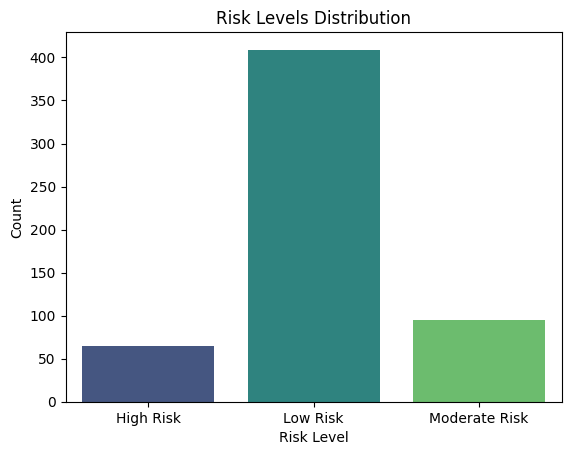

Risk assessment completed. Results saved to 'risk_assessment.csv'.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('breast_cancer_data.csv')

# Convert 'diagnosis' to binary: Malignant (M=1), Benign (B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Step 1: Select the 10 most relevant features
selected_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Step 2: Separate malignant and benign cases for thresholding
malignant = data[data['diagnosis'] == 1]
benign = data[data['diagnosis'] == 0]

# Calculate thresholds based on malignant median values
thresholds = {feature: malignant[feature].median() for feature in selected_features}

# Step 3: Define a risk assessment function
def assess_risk(row):
    risk_score = 0

    # Add risk points based on conditions
    for feature, threshold in thresholds.items():
        if row[feature] > threshold:
            risk_score += 1

    # Assign risk levels
    if risk_score >= 7:  # Adjust cutoff for "High Risk" based on domain knowledge
        return "High Risk"
    elif risk_score >= 4:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Apply risk assessment to the dataset
data['Risk_Level'] = data.apply(assess_risk, axis=1)

# Step 4: Visualize risk levels distribution
sns.countplot(data=data, x='Risk_Level', palette='viridis')
plt.title("Risk Levels Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

# Step 5: Save the risk assessment results
data[['id', 'diagnosis', 'Risk_Level']].to_csv('risk_assessment.csv', index=False)

print("Risk assessment completed. Results saved to 'risk_assessment.csv'.")
